In [1]:
from collaborative_filtering_model import CollaborativeFiltering

import sys
from pprint import pprint
sys.path.append("../dataset")
from data_loader import DataLoader, linear_normalize_scores_per_user_factory, gaussian_normalize_scores_per_user_factory, percentile_normalize_scores_per_user

In [2]:
# data_loader = DataLoader()
data_loader = DataLoader(edge_scoring_function = (lambda edge_data: edge_data['playtime_forever']), score_normalization_functions = [percentile_normalize_scores_per_user, gaussian_normalize_scores_per_user_factory(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever'])
network = data_loader.get_full_network()
data_loader.load_random_train_test_network(network=network, train_percentage=0.9, test_percentage=0.1, seed=0)

Total Number of Features: 3422500


100%|██████████| 250/250 [01:45<00:00,  2.38it/s]


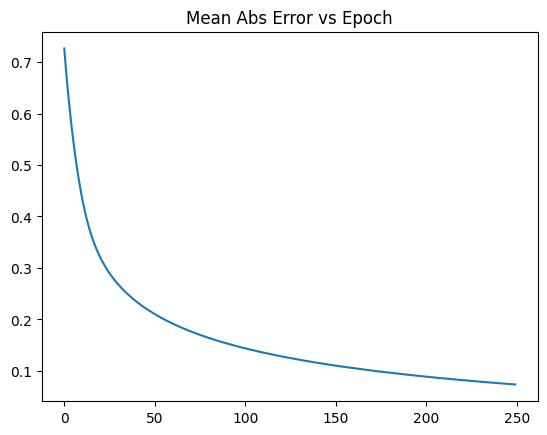

In [3]:
model = CollaborativeFiltering(num_epochs = 250, num_user_embedding = 500, num_game_embedding = 500, learning_rate = 0.001, regularization = 0.00)
model.set_data_loader(data_loader)
model.train(debug=True)
model.save('test_collaborative_filtering.pkl', overwrite=True)

In [4]:
pprint(model.score_and_predict_n_games_for_user(76561199437467620)[:10])
pprint(model.score_and_predict_n_games_for_user(76561199437467620)[-10:])
pprint(model.score_and_predict_n_games_for_user(76561198138705933)[:10])
pprint(model.score_and_predict_n_games_for_user(76561198138705933)[-10:])

[(2305790, {'score': 1.076665158779566}),
 (2322560, {'score': 1.0546656160679704}),
 (939400, {'score': 1.052629343046332}),
 (769920, {'score': 1.0395502234991265}),
 (1677740, {'score': 1.0374914485283409}),
 (1029550, {'score': 1.032354501108217}),
 (1928420, {'score': 1.0319963360032234}),
 (1453490, {'score': 1.031279794526388}),
 (1531430, {'score': 1.0305929124267785}),
 (270880, {'score': 1.029149721239966})]
[(1036890, {'score': 0.5607852374622879}),
 (518150, {'score': 0.5594328978879763}),
 (606480, {'score': 0.5584846394388334}),
 (930910, {'score': 0.5572756917320993}),
 (678460, {'score': 0.556915393550746}),
 (537540, {'score': 0.5550768878671295}),
 (588180, {'score': 0.5541459956164516}),
 (677480, {'score': 0.5519824626001859}),
 (692200, {'score': 0.5491563002752762}),
 (257710, {'score': 0.5434893208627283})]
[(2305790, {'score': 1.210050768665428}),
 (2322560, {'score': 1.1969177424018353}),
 (939400, {'score': 1.1759671984233493}),
 (578080, {'score': 1.174025171

In [5]:
second_common_neighbors_model = CollaborativeFiltering(num_epochs = 20, num_user_embedding = 50, num_game_embedding = 50, learning_rate = 0.01, regularization = 0.05)
second_common_neighbors_model.set_data_loader(data_loader)
second_common_neighbors_model.load('test_collaborative_filtering.pkl')